# Exercise 1 

In this exercise, we will keep practicing Convolutional Neural Network (CNN) to predict digit labels on the popular `mnist` data set.

### Exercise 1(a) (3 points)

Load the `mnist` data as `train` and `test` data sets.

In [7]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Exercise 1(b) (12 points)

Build a CNN model as follows:

- Change the digit labels to 0-1 encoding.
- The CNN model should have the following layers in the given order:
    - `Conv2D` with 32 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Conv2D` with 64 filters, `kernel_size=(3,3)` and `activation=relu`
    - `MaxPooling2D` with `pool_size=(2,2)`
    - `Flatten`
    - `Dense` with 128 neurons and `activation=relu`
    - `Dense` with 10 neurons and `activation=softmax`
- Evaluate the model on the `test` data set.


In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

md1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md1.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split = 0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7832 - loss: 4.6491 - val_accuracy: 0.9741 - val_loss: 0.0901
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9761 - loss: 0.0773 - val_accuracy: 0.9819 - val_loss: 0.0641
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9869 - loss: 0.0428 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9911 - loss: 0.0304 - val_accuracy: 0.9838 - val_loss: 0.0581
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9831 - val_loss: 0.0664
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9852 - val_loss: 0.0604
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9935 - loss: 0.0177 - val_accuracy: 0.9840 - val_loss: 0.0694
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accu

In [9]:
test_loss, test_acc = md1.evaluate(x_test, y_test, verbose = 0)
print(test_acc)

0.9858999848365784


# Exercise 2 

In this exercise, we will practive data augmentation concepts to boost the performance of CNN models.

## Exercise 2(a) (10 points)

Using the `ImageDataGenerator` from `TensorFlow` augment the `mnist` data. Consider the below configuration to augment the `mnist` data set.

```
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,           # Randomly zoom images by up to 10%
    horizontal_flip=False,   # Not flipping since MNIST digits should not be flipped
)
```

Reload the `mnist` data set, apply the `datagen` to a few of the images, and visualize them.

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1)

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,           # Randomly zoom images by up to 10%
    horizontal_flip=False,   # Not flipping since MNIST digits should not be flipped
)

# fir generator
datagen.fit(x_train)

def visualize_augmentation(original_img):
    plt.figure(figsize=(12,8))
    
    plt.subplot(1,5,1)
    
    plt.imshow(original_img.squeeze(), cmap='grey')
    plt.title('original')
    
    for i in range(4):
        augmented_img = datagen.random_transform(original_img)
        
        plt.subplot(1,5,i+2)
        plt.imshow(augmented_img.squeeze(), cmap='grey')
        plt.title(f'augmented image {i+1}')
    plt.show()

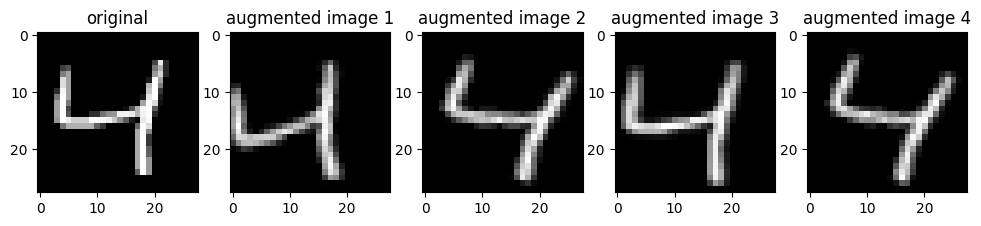

In [20]:
original_img = x_train[2]

visualize_augmentation(original_img)

### Exercise 2(b) (15 points)

Apply the data augmentation from part 2(a) to the model from part 1(b).

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.1,   # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height)
    zoom_range=0.1,           # Randomly zoom images by up to 10%
    horizontal_flip=False,   # Not flipping since MNIST digits should not be flipped
)

md2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

md2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

md2.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=50, validation_data=(x_test, y_test))


Epoch 1/50


c:\Users\gmgma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7076 - loss: 3.0846 - val_accuracy: 0.9741 - val_loss: 0.0805
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9487 - loss: 0.1656 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9616 - loss: 0.1233 - val_accuracy: 0.9825 - val_loss: 0.0522
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9695 - loss: 0.0951 - val_accuracy: 0.9865 - val_loss: 0.0426
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9732 - loss: 0.0883 - val_accuracy: 0.9784 - val_loss: 0.0730
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9768 - loss: 0.0740 - val_accuracy: 0.9848 - val_loss: 0.0525
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9780 - loss: 0.0711 - val_accuracy: 0.9888 - val_loss: 0.0350
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9792 - loss: 0.0661 - val_accurac

In [16]:
test_loss, test_acc = md2.evaluate(x_test, y_test, verbose = 0)
print(test_acc)

0.9894999861717224


### Exercise 2(c) (2 points)

What model would you use to predict the digit label in the `mnist` data set? 

Based on the results I would choose model 2 because it has the highest accuracy. 